# Ford GoBike System Data exploration
## by Moaz Magdy

## Investigation Overview

> The goal of this presentation is to investigate the features are best for predicting the trip duration. The features of interest were: trip duration, member gender, user type, trip start time, and member age

## Dataset Overview

> This dataset includes trip information from Ford GoBike, a bike-sharing system in California's San Francisco Bay Area established in 2013. The data includes trips from Ford GoBike system for Feb. 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('modified_data.csv')

## Distribution of the main variable of interest: trip duration.

The distribution is highly right_skewed with several extreme values. So, we will consider trip durations greater than the maximum whisker (Q3 + 1.5 IQR) as outliers and we will drop them out, then we will apply a log transformation on the data.

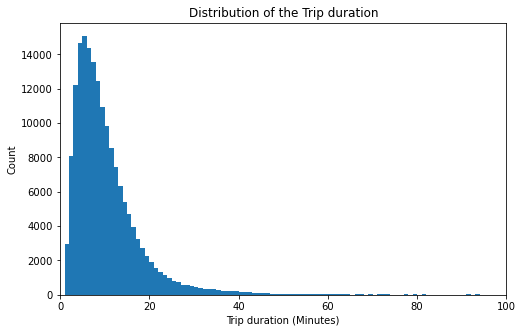

In [3]:
# Distribution of the duration_min feature
plt.figure(figsize= [8,5])
bin_size = 1
bins = np.arange(0, data.duration_min.max() + bin_size, bin_size)
plt.hist(data.duration_min, bins= bins)
plt.xlim([0,100])
plt.xlabel('Trip duration (Minutes)')
plt.ylabel('Count')
plt.title('Distribution of the Trip duration');

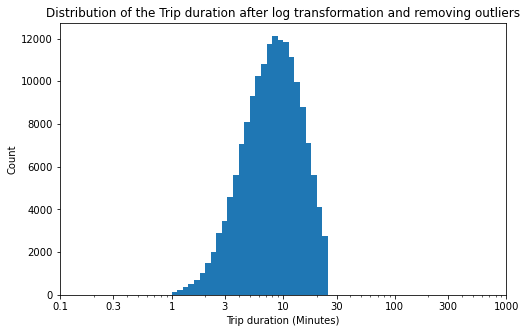

In [4]:
# Calculate Q3
duration_q3 = data.duration_min.quantile(0.75)
# Calculate IQR
duration_IQR = data.duration_min.quantile(0.75) - data.duration_min.quantile(0.25)
# Get the index of outliers
outliers_indx = data.query('duration_min > @duration_q3 + @duration_IQR * 1.5').index
# Drop the outliers
data.drop(index= outliers_indx, inplace= True)
# Distribution of the duration_sec feature after log transformation
bin_size = 0.05
bins = 10 ** np.arange(0, np.log10(data.duration_min.max()) + bin_size, bin_size)
plt.figure(figsize= (8,5))
plt.hist(data.duration_min, bins= bins)
plt.xscale('log')
plt.xticks([0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000], ['0.1', '0.3', '1', '3', '10', '30', '100', '300', '1000'])
plt.xlabel('Trip duration (Minutes)')
plt.ylabel('Count')
plt.title('Distribution of the Trip duration after log transformation and removing outliers');

When plotted on a log-scale, the trip duration distribution looks unimodal, with one large peak around 10 minutes

## Distribution of user type feature.

The proportion plot for the user_type feature shows that about %90 of users are subscribers.

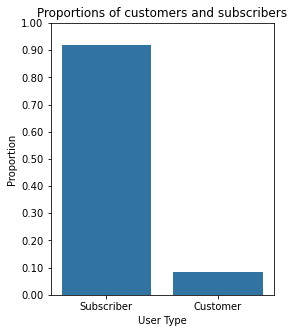

In [5]:
# Creat a proportion plot for user_type

n_user = data['user_type'].value_counts().sum()
max_user_type = data['user_type'].value_counts()[0]
max_prop = max_user_type/n_user
tick_props = np.arange(0, max_prop + 0.1, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize= (4,5))
sns.countplot(data = data, x='user_type', color= sns.color_palette()[0])
plt.yticks(tick_props * n_user, tick_names)
plt.xlabel('User Type')
plt.ylabel('Proportion')
plt.title('Proportions of customers and subscribers');

## Distribution of member gender feature.

The proportions plot for member gender feature shows that about 74% of members are males, and 24% are females.

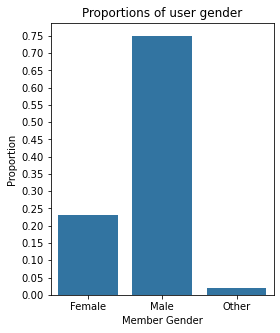

In [6]:
# Creat a proportion plot for member_gender

n_user = data['member_gender'].value_counts().sum()
max_user_gender = data['member_gender'].value_counts()[0]
max_prop = max_user_gender/n_user
tick_props = np.arange(0, max_prop + 0.05, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize= (4,5))
sns.countplot(data = data, x='member_gender', color= sns.color_palette()[0])
plt.yticks(tick_props * n_user, tick_names)
plt.xlabel('Member Gender')
plt.ylabel('Proportion')
plt.title('Proportions of user gender');

## Distribution of trip start time.

The above histogram for number of trips over the day shows that the distribution is bimodal, with one big peak around 8 am (1 hour after sunrise), and one big peak around 5 pm (1 hour before sunset).

<Figure size 864x360 with 0 Axes>

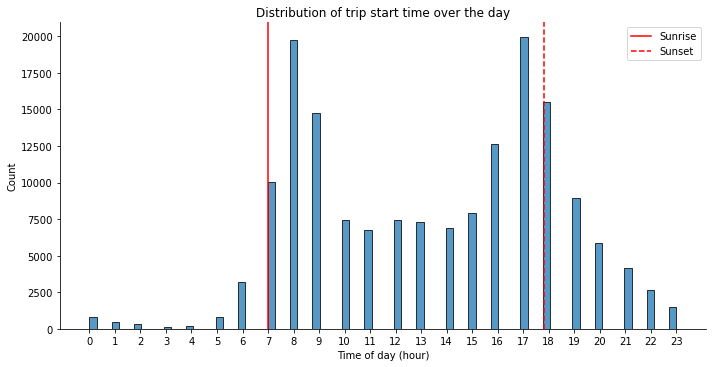

In [7]:
# Histogram for number of trips over 'time_of_day'.
bin_size = 1
bins = np.arange(-0.5, data.time_of_day.max() + bin_size, bin_size)
plt.figure(figsize= (12,5))
sns.displot(data = data, x = 'time_of_day', color= sns.color_palette()[0], aspect= 2)
# plt.hist(data.time_of_day, color= base_color, bins= bins, )
plt.xlabel('Time of day (hour)')
plt.title('Distribution of trip start time over the day')
xticks = np.arange(0, 24,1)
plt.xticks(xticks, ['{}'.format(v) for v in xticks])
sunrise_avg = 7 #Source: (https://www.sunrise-and-sunset.com/en/sun/united-states/california__mo/2019/february)
sunset_avg = 17.8 #Source: (https://www.sunrise-and-sunset.com/en/sun/united-states/california__mo/2019/february)
# plot a vertical time to indicate the sunrise.
plt.axvline(x = sunrise_avg, ymin=0 , ymax = 20000, color = 'red', linestyle = '-', label = 'Sunrise')
# plot a vertical time to indicate the sunset.
plt.axvline(x = sunset_avg, ymin=0 , ymax = 20000, color = 'red', linestyle = '--', label = 'Sunset')
plt.legend();

## Distribution of member age

The distribution of member age  is right_skewed, with most users below 40 years, few users between 40 and 60, and very few users above 60.

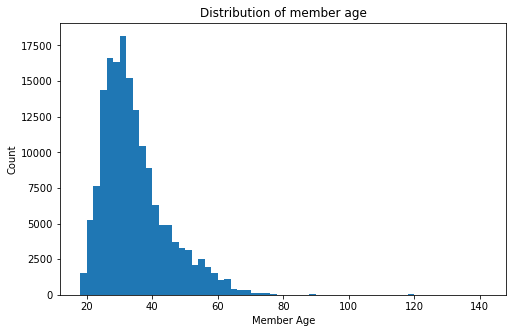

In [8]:
# Histogram for member_age
plt.figure(figsize= [8,5])
bin_size = 2
bins = np.arange(data.member_age.min(), data.member_age.max() + bin_size, bin_size)
plt.hist(x= data['member_age'],bins= bins)
plt.xlabel('Member Age')
plt.ylabel('Count')
plt.title('Distribution of member age');

## Effect of member gender on trip duration

The member gender seems to a little effect on trip durations such that females tend ride slightly longer than males.

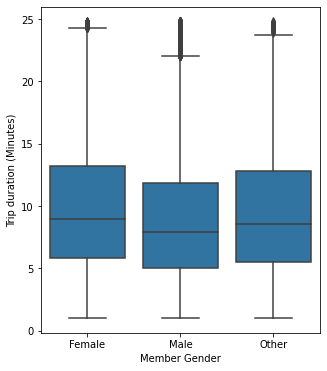

In [9]:
# Create a boxplot between member_gender and trip duration
plt.figure(figsize= (5,6))
sns.boxplot(data= data, x= 'member_gender', y= 'duration_min', color= sns.color_palette()[0])
plt.xlabel('Member Gender')
plt.ylabel('Trip duration (Minutes)');

## Effect of user type on trip duration

User type seems to have a strong effect on trip duration. The trip duration for customers is longer than that for subscribers regardless of day of week.

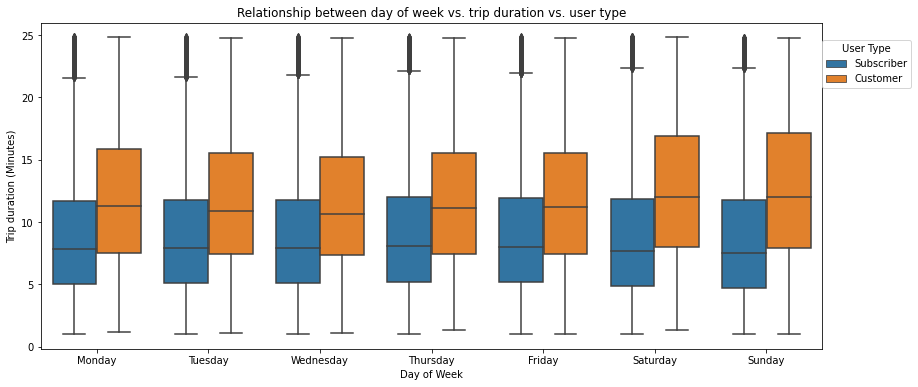

In [10]:
# Create a boxplot between day_of_week, duration_min, and user_type.
plt.figure(figsize= (14,6))
sns.boxplot(data= data, x = 'day_of_week', y= 'duration_min', hue= 'user_type', 
            order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(loc = [1,0.8], title= 'User Type')
plt.xlabel('Day of Week')
plt.ylabel('Trip duration (Minutes)')
plt.title('Relationship between day of week vs. trip duration vs. user type');

## Effect of member age on trip duration

Surprisingly, the member age doesn't seem to have an effect on the trip duration.

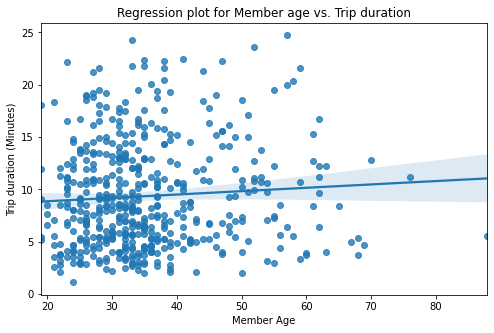

In [11]:
plt.figure(figsize=[8,5])
sns.regplot(data= data.sample(500), x='member_age', y= 'duration_min')
plt.xlabel('Member Age')
plt.ylabel('Trip duration (Minutes)')
plt.title('Regression plot for Member age vs. Trip duration');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!